In [1]:
import pandas as pd
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

In [2]:
img_path = "/Applications/Projects/Bladder Research/EndoscopicBladderTissue/LGC/case_005_pt_001_frame_0000.png"
img = Image.open(img_path)

print(img.size)
print(img.mode)

(350, 350)
RGB


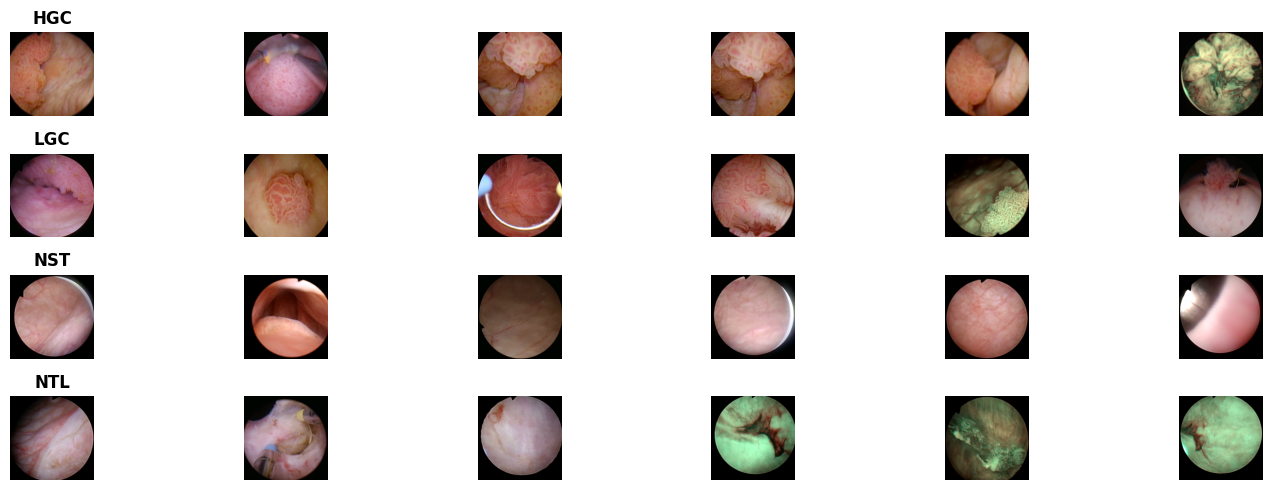

In [3]:
hgc_path = '/Applications/Projects/Bladder Research/EndoscopicBladderTissue/HGC'
lgc_path = '/Applications/Projects/Bladder Research/EndoscopicBladderTissue/LGC'
nst_path = "/Applications/Projects/Bladder Research/EndoscopicBladderTissue/NST"
ntl_path = "/Applications/Projects/Bladder Research/EndoscopicBladderTissue/NTL"

hgc_path_files = [f for f in os.listdir(hgc_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
lgc_path_files = [f for f in os.listdir(lgc_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
nst_path_files = [f for f in os.listdir(nst_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
ntl_path_files = [f for f in os.listdir(ntl_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Get 6 random images from each class
hgc_images = random.sample(hgc_path_files, 6)
lgc_images = random.sample(lgc_path_files, 6)
nst_images = random.sample(nst_path_files, 6)
ntl_images = random.sample(ntl_path_files, 6)

# Create figure with subplots
fig, axes = plt.subplots(4, 6, figsize=(15, 5))

# Plot HGC images
for i, img_name in enumerate(hgc_images):
    img = plt.imread(os.path.join(hgc_path, img_name))
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_title('HGC', fontsize=12, fontweight='bold')

# Plot LGC images
for i, img_name in enumerate(lgc_images):
    img = plt.imread(os.path.join(lgc_path, img_name))
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_title('LGC', fontsize=12, fontweight='bold')
        
for i, img_name in enumerate(nst_images):
    img = plt.imread(os.path.join(nst_path, img_name))
    axes[2, i].imshow(img)
    axes[2, i].axis('off')
    if i == 0:
        axes[2, i].set_title('NST', fontsize=12, fontweight='bold')

for i, img_name in enumerate(ntl_images):
    img = plt.imread(os.path.join(ntl_path, img_name))
    axes[3, i].imshow(img)
    axes[3, i].axis('off')
    if i == 0:
        axes[3, i].set_title('NTL', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('sample_images_for_paper.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
ann_csv = "/Applications/Projects/Bladder Research/EndoscopicBladderTissue/annotations.csv"

ann_df = pd.read_csv(ann_csv)
train = ann_df[ann_df['sub_dataset'] == 'train'].value_counts(['tissue type']).reset_index(name='count')
test = ann_df[ann_df['sub_dataset'] == 'test'].value_counts(['tissue type']).reset_index(name='count')
valid = ann_df[ann_df['sub_dataset'] == 'val'].value_counts(['tissue type']).reset_index(name='count')

In [4]:
train

,tissue type,count
0,LGC,482
1,NST,379
2,HGC,309
3,NTL,87


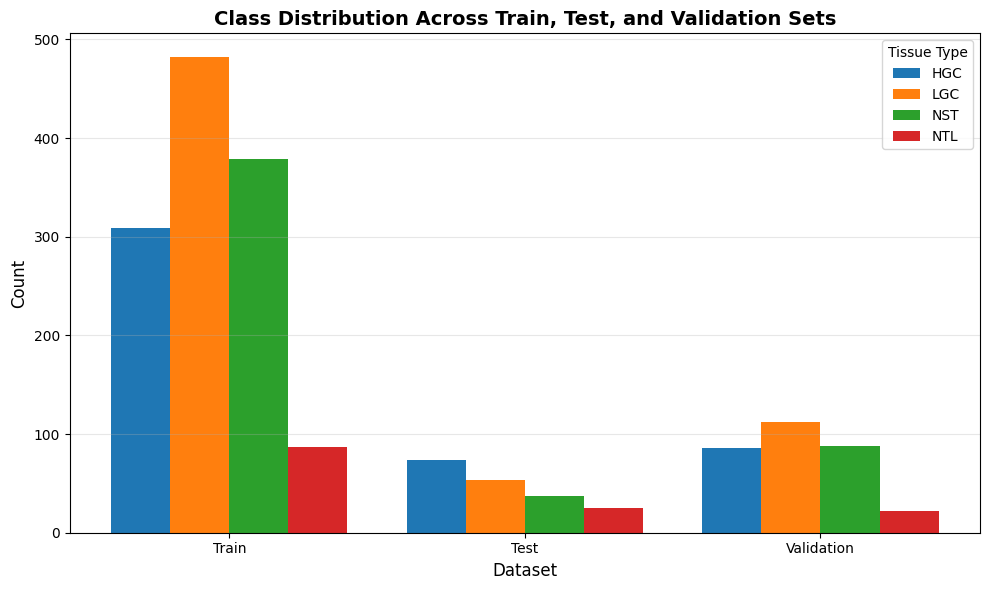

In [5]:
import numpy as np

# Get all unique tissue types
tissue_types = sorted(set(train['tissue type']) | set(test['tissue type']) | set(valid['tissue type']))

# Create dictionaries for easy lookup
train_dict = dict(zip(train['tissue type'], train['count']))
test_dict = dict(zip(test['tissue type'], test['count']))
valid_dict = dict(zip(valid['tissue type'], valid['count']))

# Prepare data with datasets on x-axis
datasets = ['Train', 'Test', 'Validation']
x = np.arange(len(datasets))
width = 0.2

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each tissue type
for i, tissue in enumerate(tissue_types):
    counts = [
        train_dict.get(tissue, 0),
        test_dict.get(tissue, 0),
        valid_dict.get(tissue, 0)
    ]
    ax.bar(x + i * width, counts, width, label=tissue)

# Customize the plot
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Class Distribution Across Train, Test, and Validation Sets', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(tissue_types) - 1) / 2)
ax.set_xticklabels(datasets)
ax.legend(title='Tissue Type')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
train_img_type = ann_df[ann_df['sub_dataset'] == 'train'].value_counts(['imaging type']).reset_index(name='count')
test_img_type = ann_df[ann_df['sub_dataset'] == 'test'].value_counts(['imaging type']).reset_index(name='count')
valid_img_type = ann_df[ann_df['sub_dataset'] == 'val'].value_counts(['imaging type']).reset_index(name='count')

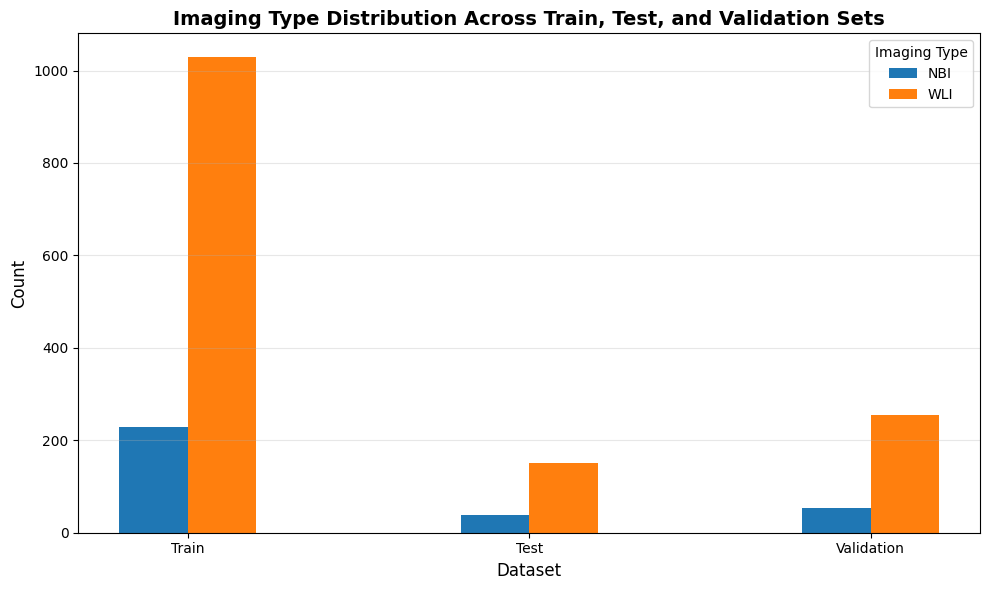

In [10]:
# Get all unique tissue types
tissue_types = sorted(set(train_img_type['imaging type']) | set(test_img_type['imaging type']) | set(valid_img_type['imaging type']))

# Create dictionaries for easy lookup
train_dict = dict(zip(train_img_type['imaging type'], train_img_type['count']))
test_dict = dict(zip(test_img_type['imaging type'], test_img_type['count']))
valid_dict = dict(zip(valid_img_type['imaging type'], valid_img_type['count']))

# Prepare data with datasets on x-axis
datasets = ['Train', 'Test', 'Validation']
x = np.arange(len(datasets))
width = 0.2

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each tissue type
for i, tissue in enumerate(tissue_types):
    counts = [
        train_dict.get(tissue, 0),
        test_dict.get(tissue, 0),
        valid_dict.get(tissue, 0)
    ]
    ax.bar(x + i * width, counts, width, label=tissue)

# Customize the plot
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Imaging Type Distribution Across Train, Test, and Validation Sets', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(tissue_types) - 1) / 2)
ax.set_xticklabels(datasets)
ax.legend(title='Imaging Type')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('imaging_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
train_sum = train['count'].sum()
valid_sum = valid['count'].sum()
test_sum = test['count'].sum()
combined = train_sum + valid_sum + test_sum
print(f'Train: {train_sum} ({round((train_sum/combined)*100,2)}%)')
print(f'Validation: {valid_sum} ({round((valid_sum/combined)*100,2)}%)')
print(f'Test: {test_sum} ({round((test_sum/combined)*100,2)}%)')

Train: 1257 (71.66%)
Validation: 308 (17.56%)
Test: 189 (10.78%)
